### Part 6
SVMs on some simple 2D data sets to see how they work. Then look at a set of email data and build a classifier on the processed emails using a SVM to determine if they are spam or not

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

In [3]:
raw_data = loadmat('data/ex6data1.mat')

In [4]:
raw_data

{'X': array([[ 1.9643  ,  4.5957  ],
        [ 2.2753  ,  3.8589  ],
        [ 2.9781  ,  4.5651  ],
        [ 2.932   ,  3.5519  ],
        [ 3.5772  ,  2.856   ],
        [ 4.015   ,  3.1937  ],
        [ 3.3814  ,  3.4291  ],
        [ 3.9113  ,  4.1761  ],
        [ 2.7822  ,  4.0431  ],
        [ 2.5518  ,  4.6162  ],
        [ 3.3698  ,  3.9101  ],
        [ 3.1048  ,  3.0709  ],
        [ 1.9182  ,  4.0534  ],
        [ 2.2638  ,  4.3706  ],
        [ 2.6555  ,  3.5008  ],
        [ 3.1855  ,  4.2888  ],
        [ 3.6579  ,  3.8692  ],
        [ 3.9113  ,  3.4291  ],
        [ 3.6002  ,  3.1221  ],
        [ 3.0357  ,  3.3165  ],
        [ 1.5841  ,  3.3575  ],
        [ 2.0103  ,  3.2039  ],
        [ 1.9527  ,  2.7843  ],
        [ 2.2753  ,  2.7127  ],
        [ 2.3099  ,  2.9584  ],
        [ 2.8283  ,  2.6309  ],
        [ 3.0473  ,  2.2931  ],
        [ 2.4827  ,  2.0373  ],
        [ 2.5057  ,  2.3853  ],
        [ 1.8721  ,  2.0577  ],
        [ 2.0103  ,  2.3546  ],
   

Visualize it as a scatter plot where the class label is denoted by a symbol ('+' for positive, 'o' for negative)

In [6]:
data = pd.DataFrame(raw_data['X'], columns = ['X1', 'X2'])
data['y'] = raw_data['y']

In [7]:
data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [8]:
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

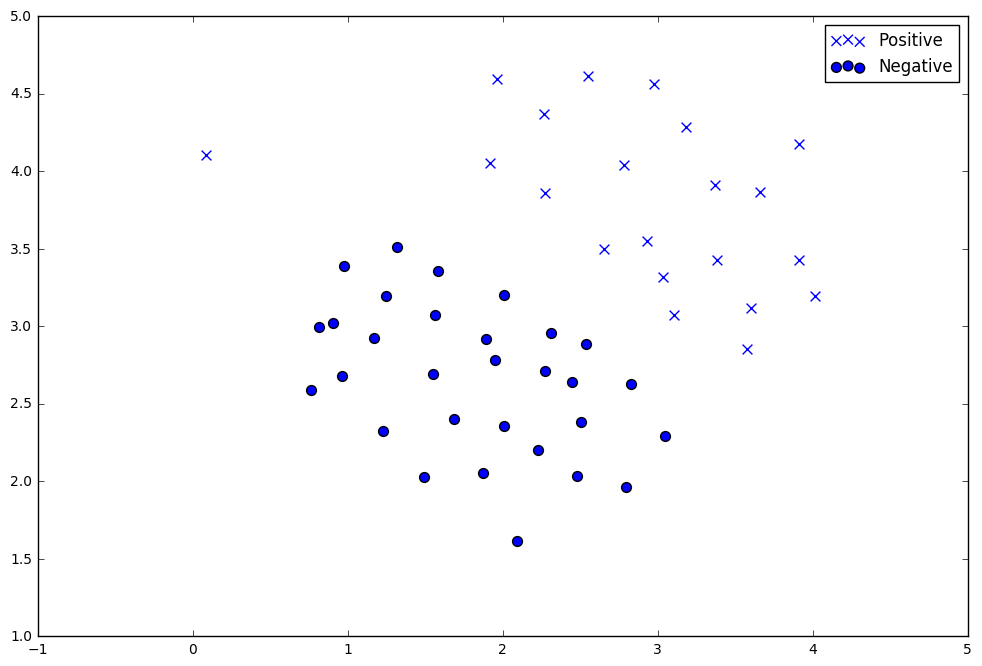

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker = 'x', label = 'Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker = 'o', label = 'Negative')
ax.legend()
plt.show()

Notice that there is one outlier positive example that sits apart from the others. The classes are still linearly separable but it's a very tight fit. We're going to train a linear support vector machine to learn the class boundary. In this exercise we're not tasked with implementing an SVM from scratch, so I'm going to use the one built into scikit-learn.

In [12]:
from sklearn import svm

In [13]:
svc = svm.LinearSVC(C=1, loss = 'hinge', max_iter=1000)

In [14]:
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [15]:
svc.fit(data[['X1', 'X2']], data['y'])

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [16]:
svc.score(data[['X1', 'X2']], data['y'])

0.98039215686274506

Almost perfect, seems to have mis-classified the outlier. Let's increase C.

In [18]:
svc2 = svm.LinearSVC(C=100, loss = 'hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data. We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

In [22]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

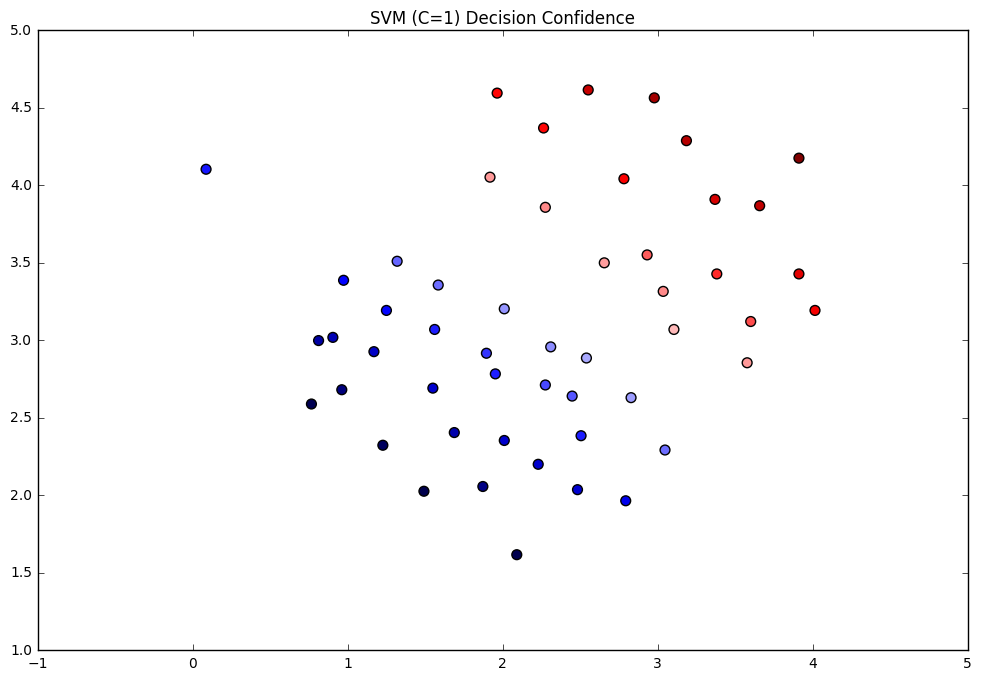

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')

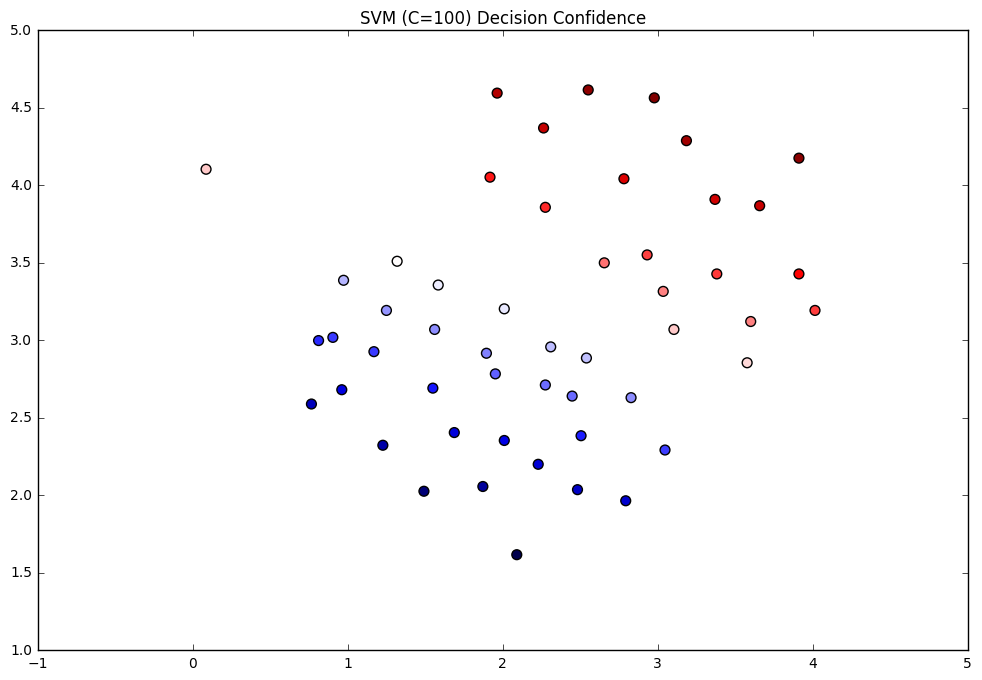

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')

The difference is a bit subtle but look at the color of the points near the boundary. In the first image the points near the boundary are a strong red or blue, indicating that they're a solid distance from the hyperplane. This is not the case in the second image, where a number of points are nearly white, indicating that they are directly adjacent to the hyperplane.

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels. We're first tasked with implementing a gaussian kernel function. Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

In [26]:
def gaussian_kernel (x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2)**2) / (2*(sigma **2))))

In [27]:
x1 = np.array([1.0,2.0,1.0])
x2 = np.array([0.0,4.0,-1.0])
sigma = 2
gaussian_kernel(x1,x2,sigma)

0.32465246735834974

In [29]:
raw_data = loadmat('data/ex6data2.mat')

In [31]:
data = pd.DataFrame(raw_data['X'], columns = ['X1', 'X2'])
data['y'] = raw_data['y']

In [32]:
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

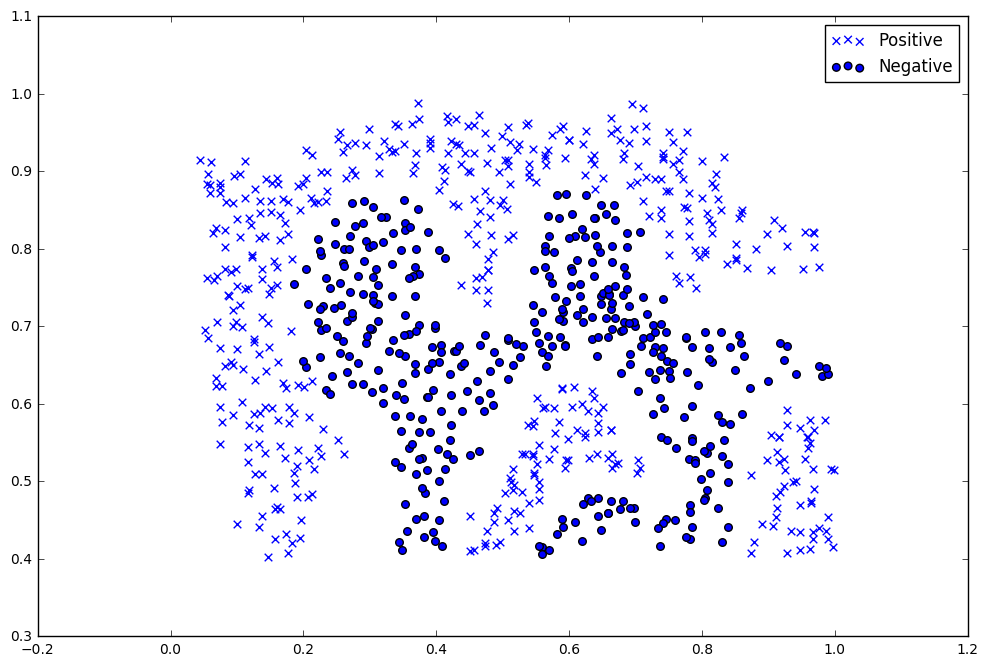

In [34]:
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker = 'x', label = 'Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker = 'o', label = 'Negative')
ax.legend()
plt.show()

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data. To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label. We'll see from the result that it gets most of them right.

In [35]:
svc = svm.SVC(C=100, gamma = 10, probability = True)

In [36]:
svc.fit(data[['X1', 'X2']], data['y'])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

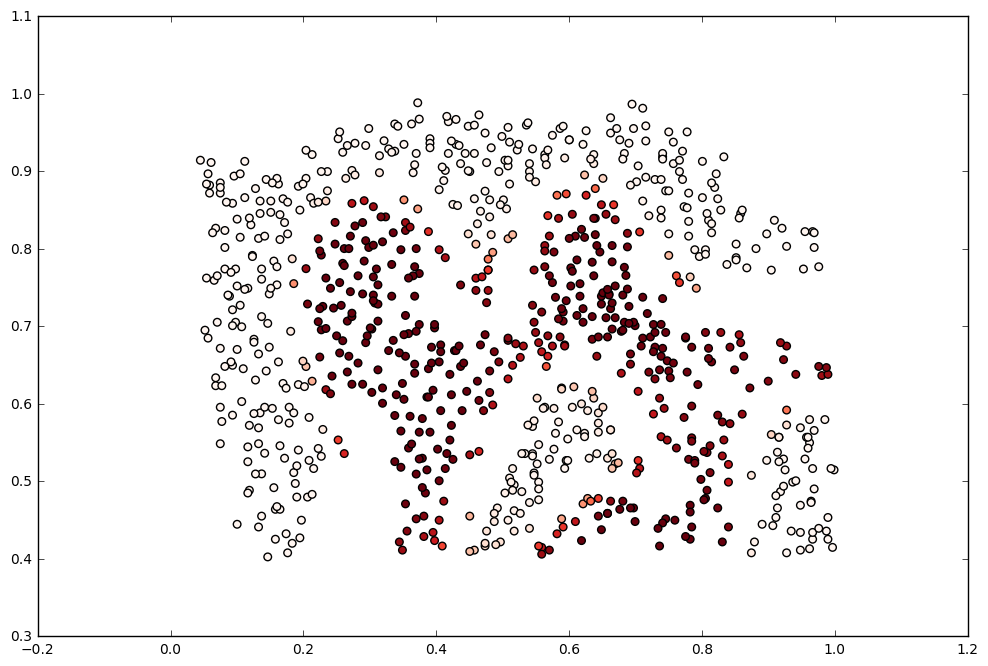

In [39]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds') 
plt.show()

For the third data set we're given both training and validation sets and tasked with finding optimal hyper-parameters for an SVM model based on validation set performance. Although we could use scikit-learn's built-in grid search to do this quite easily, in the spirit of following the exercise directions we'll implement a simple grid search from scratch

In [40]:
raw_data = loadmat('data/ex6data3.mat')

In [42]:
X = raw_data['X']
X_val = raw_data['Xval']
y = raw_data['y'].ravel()
y_val = raw_data['yval'].ravel()

In [43]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

In [47]:
best_score = 0
best_params = {'C': None, 'gamma':None}

In [48]:
for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma = gamma)
        svc.fit(X,y)
        score = svc.score(X_val, y_val)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
            
best_score, best_params

(0.96499999999999997, {'C': 0.3, 'gamma': 100})

Now we'll move on to the last part of the exercise. In this part our objective is to use SVMs to build a spam filter. In the exercise text, there's a task involving some text pre-processing to get our data in a format suitable for an SVM to handle. However, the task is pretty trivial (mapping words to an ID from a dictionary that's provided for the exercise) and the rest of the pre-processing steps such as HTML removal, stemming, normalization etc. are already done. Rather than reproduce these pre-processing steps, I'm going to skip ahead to the machine learning task which involves building a classifier from pre-processed train and test data sets consisting of spam and non-spam emails transformed to word occurance vectors.

In [49]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')

In [53]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

In [54]:
X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

Each document has been converted to a vector with 1,899 dimensions corresponding to the 1,899 words in the vocabulary. The values are binary, indicating the presence or absence of the word in the document. At this point, training and evaluation are just a matter of fitting the testing the classifer.

In [55]:
svc = svm.SVC()

In [56]:
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
print('Test Accuracy = {0}%'.format(np.round(svc.score(Xtest,ytest) * 100, 2)))

Test Accuracy = 95.3%
